# International Football Results between 1872 and 2023

## This dataset contains every international football match from every tournament and friendly match.

Let's start by loading the dataset

In [1]:
import os
os.chdir('/Users/fredhome/Jupyter Datasets/International Football Results')
current_path = os.getcwd()
current_path

'/Users/fredhome/Jupyter Datasets/International Football Results'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('results.csv')
pens = pd.read_csv('shootouts.csv')
print(pens.head())
df.head()

         date    home_team         away_team       winner
0  1967-08-22        India            Taiwan       Taiwan
1  1971-11-14  South Korea  Vietnam Republic  South Korea
2  1972-05-07  South Korea              Iraq         Iraq
3  1972-05-17     Thailand       South Korea  South Korea
4  1972-05-19     Thailand          Cambodia     Thailand


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Let's merge the data and analyse the full dataset.

In [3]:
results = df.merge(pens, how='left', left_on = ['date', 'home_team', 'away_team'],\
                     right_on = ['date', 'home_team', 'away_team'])
results = results.rename(columns={'winner': 'penalty_winner'})

print(results.info())

print(results.describe())

results.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44691 entries, 0 to 44690
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            44691 non-null  object
 1   home_team       44691 non-null  object
 2   away_team       44691 non-null  object
 3   home_score      44691 non-null  int64 
 4   away_score      44691 non-null  int64 
 5   tournament      44691 non-null  object
 6   city            44691 non-null  object
 7   country         44691 non-null  object
 8   neutral         44691 non-null  bool  
 9   penalty_winner  551 non-null    object
dtypes: bool(1), int64(2), object(7)
memory usage: 3.5+ MB
None
         home_score    away_score
count  44691.000000  44691.000000
mean       1.738717      1.178492
std        1.746678      1.393406
min        0.000000      0.000000
25%        1.000000      0.000000
50%        1.000000      1.000000
75%        2.000000      2.000000
max       31.000000     21.

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,penalty_winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,NaN
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,NaN
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,NaN
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,NaN


No null values and all the data types are correct so we can continue.

In [4]:
results.penalty_winner= results.penalty_winner.fillna('No Penalties')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,penalty_winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,No Penalties
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,No Penalties
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,No Penalties
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,No Penalties
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,No Penalties


In [5]:
def WLD(row):
    if row['home_score'] > row['away_score']:
        return row['home_team']
    elif row['home_score'] == row['away_score']:
        if row['penalty_winner'] == 'No Penalties':
            return 'Draw'
        else:
            return row['penalty_winner']
    else:
        return row['away_team']

results['winner'] = results.apply(lambda row: WLD(row), axis=1)
results.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,penalty_winner,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,No Penalties,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,No Penalties,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,No Penalties,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,No Penalties,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,No Penalties,Scotland
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,No Penalties,Scotland
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,No Penalties,Scotland
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,No Penalties,Scotland
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,No Penalties,Scotland
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,No Penalties,Scotland


In [6]:
results[results.penalty_winner != 'No Penalties'].head()

#checking if our function worked

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,penalty_winner,winner
6648,1967-08-22,India,Taiwan,1,1,Merdeka Tournament,Kuala Lumpur,Malaysia,True,Taiwan,Taiwan
8110,1971-11-14,South Korea,Vietnam Republic,1,1,King's Cup,Bangkok,Thailand,True,South Korea,South Korea
8281,1972-05-07,South Korea,Iraq,0,0,AFC Asian Cup,Bangkok,Thailand,True,Iraq,Iraq
8299,1972-05-17,Thailand,South Korea,1,1,AFC Asian Cup,Bangkok,Thailand,False,South Korea,South Korea
8302,1972-05-19,Thailand,Cambodia,2,2,AFC Asian Cup,Bangkok,Thailand,False,Thailand,Thailand


In [7]:
results['year'] = results['date'].str.extract('(\d{4})')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,penalty_winner,winner,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,No Penalties,Draw,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,No Penalties,England,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,No Penalties,Scotland,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,No Penalties,Draw,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,No Penalties,Scotland,1876


### It would be interesting to know the highest scoring matches, so let's add a total_score column

In [8]:
results['total_score'] = results.home_score + results.away_score

print(results.iloc[results.total_score.argmax()]) # we use argmax here to return the index of the game with the max total
                                        # using max would make python use the max total (31) as the index

top10_total_scores = results.sort_values('total_score', ascending=False).head(10)

top10_total_scores

date                                2001-04-11
home_team                            Australia
away_team                       American Samoa
home_score                                  31
away_score                                   0
tournament        FIFA World Cup qualification
city                             Coffs Harbour
country                              Australia
neutral                                  False
penalty_winner                    No Penalties
winner                               Australia
year                                      2001
total_score                                 31
Name: 24160, dtype: object


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,penalty_winner,winner,year,total_score
24160,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,No Penalties,Australia,2001,31
8027,1971-09-13,Tahiti,Cook Islands,30,0,South Pacific Games,Papeete,French Polynesia,False,No Penalties,Tahiti,1971,30
11225,1979-08-30,Fiji,Kiribati,24,0,South Pacific Games,Nausori,Fiji,False,No Penalties,Fiji,1979,24
24157,2001-04-09,Australia,Tonga,22,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,No Penalties,Australia,2001,22
29211,2006-11-24,Sápmi,Monaco,21,1,Viva World Cup,Hyères,France,True,No Penalties,Sápmi,2006,22
6134,1966-04-03,Libya,Oman,21,0,Arab Cup,Baghdad,Iraq,True,No Penalties,Libya,1966,21
27753,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Taiwan,True,No Penalties,North Korea,2005,21
15020,1987-12-15,American Samoa,Papua New Guinea,0,20,South Pacific Games,Nouméa,New Caledonia,True,No Penalties,Papua New Guinea,1987,20
36434,2014-06-01,Darfur,Padania,0,20,CONIFA World Football Cup,Östersund,Sweden,True,No Penalties,Padania,2014,20
22926,2000-02-14,Kuwait,Bhutan,20,0,AFC Asian Cup qualification,Kuwait City,Kuwait,False,No Penalties,Kuwait,2000,20


#### Australia's 31-0 win over American Somoa is impressive, but American Somoa were plagued by passport issues, with only 1/20 senior players able to pay and the U20s in exams. They had to play youth players, with three 15 year olds in the lineup.

#### Interestingly, Australia beat Tonga 22-0 two days earlier, and in the end finishing 1st in the WC Qualifiers with a GD of +66.

#### These wins are part of the reason that Australia are now in the Asian WC Qualificaiton Groups as opposed to the Oceanic.



## Who are the most successful countries at football?

In [9]:
top20_wins = results.winner.value_counts()[1:].head(20)   #index slice here as no.1 was a Draw
top20_wins

Brazil         666
England        604
Germany        581
Argentina      573
Sweden         526
South Korea    491
Mexico         486
Hungary        457
Italy          454
France         450
Spain          435
Netherlands    426
Uruguay        410
Scotland       392
Denmark        383
Poland         371
Russia         369
Zambia         360
Belgium        360
Egypt          353
Name: winner, dtype: int64

Let's calculate the win percentage of each country

In [10]:
total_games = results.home_team.value_counts() + results.away_team.value_counts()
print(total_games.sort_values(ascending=False).head(10))

print('\n\n Win Percentage')
win_perc = top20_wins / total_games
win_perc_top20 = win_perc.sort_values(ascending=False).head(20)
win_perc_top20

Sweden         1059.0
England        1053.0
Argentina      1026.0
Brazil         1026.0
Germany         991.0
Hungary         970.0
Mexico          942.0
Uruguay         923.0
South Korea     909.0
France          884.0
dtype: float64


 Win Percentage


Brazil         0.649123
Spain          0.590231
Germany        0.586276
England        0.573599
Argentina      0.558480
South Korea    0.540154
Italy          0.539192
Mexico         0.515924
Netherlands    0.515115
Egypt          0.513081
Russia         0.512500
France         0.509050
Sweden         0.496695
Scotland       0.479218
Hungary        0.471134
Zambia         0.467532
Denmark        0.458134
Belgium        0.444994
Uruguay        0.444204
Poland         0.432905
dtype: float64

<Axes: title={'center': 'Most Successful Countries at Football'}, xlabel='Countries', ylabel='Win Percentage'>

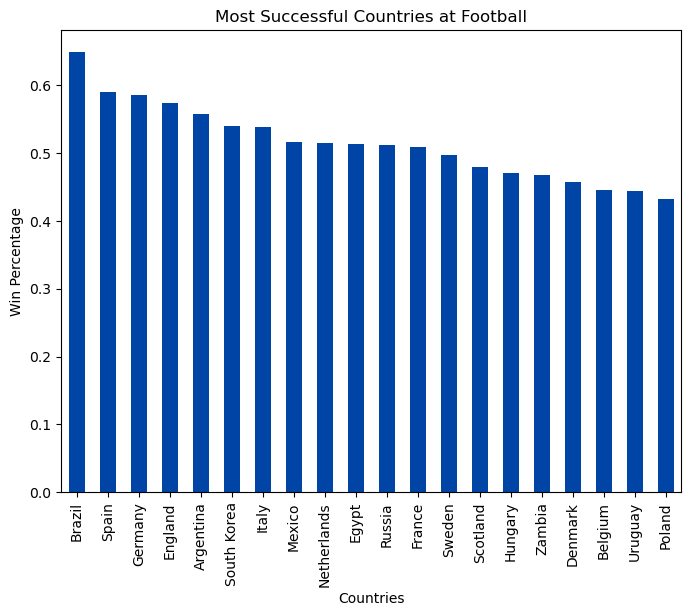

In [11]:
win_perc_top20.plot(kind = 'bar', figsize = (8,6), title = 'Most Successful Countries at Football',\
                    xlabel = 'Countries', ylabel = 'Win Percentage', color = '#0045a5')

We can see that Brazil are the most successful country in international football based on win percentage.

## Let's take a look at the World Cup

In [12]:
results_WC = results[results.tournament == 'FIFA World Cup']
results_WC.sort_values('total_score', ascending=False).head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,penalty_winner,winner,year,total_score
3680,1954-06-26,Switzerland,Austria,5,7,FIFA World Cup,Lausanne,Switzerland,False,No Penalties,Austria,1954,12
2101,1938-06-05,Brazil,Poland,6,5,FIFA World Cup,Strasbourg,France,True,No Penalties,Brazil,1938,11
3674,1954-06-20,Germany,Hungary,3,8,FIFA World Cup,Basel,Switzerland,True,No Penalties,Hungary,1954,11
12559,1982-06-15,Hungary,El Salvador,10,1,FIFA World Cup,Elche,Spain,True,No Penalties,Hungary,1982,11
4373,1958-06-08,France,Paraguay,7,3,FIFA World Cup,Norrköping,Sweden,True,No Penalties,France,1958,10
1321,1930-07-19,Argentina,Mexico,6,3,FIFA World Cup,Montevideo,Uruguay,True,No Penalties,Argentina,1930,9
9208,1974-06-18,Yugoslavia,DR Congo,9,0,FIFA World Cup,Gelsenkirchen,Germany,True,No Penalties,Yugoslavia,1974,9
3677,1954-06-23,Germany,Turkey,7,2,FIFA World Cup,Zürich,Switzerland,True,No Penalties,Germany,1954,9
4403,1958-06-28,France,Germany,6,3,FIFA World Cup,Gothenburg,Sweden,True,No Penalties,France,1958,9
3667,1954-06-17,Hungary,South Korea,9,0,FIFA World Cup,Zürich,Switzerland,True,No Penalties,Hungary,1954,9


In [13]:
WC_wins = results_WC.winner.value_counts()[1:]   # index slicing because no.1 was a draw
top10WC_wins = WC_wins.head(10)
top10WC_wins

Brazil         79
Germany        72
Argentina      53
Italy          46
France         41
England        33
Spain          32
Netherlands    31
Uruguay        26
Belgium        22
Name: winner, dtype: int64

Notice Italy have won 1 more World Cup than Argentina, yet Argentina have won more games.

Both countries have missed the World Cup 4 times, indicating that Italy usually exit the tournament earlier than Argentina.

In [14]:
WC_games = results_WC.home_team.value_counts() + results_WC.away_team.value_counts()
top10WC_games = WC_games.sort_values(ascending=False).head(10)
top10WC_games

Brazil         114.0
Germany        112.0
Argentina       88.0
Italy           83.0
England         74.0
France          73.0
Spain           67.0
Mexico          60.0
Uruguay         59.0
Netherlands     55.0
dtype: float64

In [15]:
WC_win_perc = top10WC_wins / WC_games
print(WC_win_perc.sort_values(ascending=False).head(10).round(2) *100)

Brazil         69.0
Germany        64.0
Argentina      60.0
Netherlands    56.0
France         56.0
Italy          55.0
Spain          48.0
England        45.0
Uruguay        44.0
Belgium        43.0
dtype: float64


We can see the Netherlands have the 4th highest win percentage, but have won the 8th most games. The Dutch have failed to qualify 11 times, compared to England's 3 and Germany's 0.

### What Countries Play Each Other The Most?

In [16]:
most_matches_all = results[['home_team', 'away_team', 'date']].groupby(['home_team', 'away_team']).count()
most_matches_all = most_matches_all.rename(columns={'date': 'Times Met'})
most_matches_all.sort_values('Times Met', ascending=False).head(10)

,,Times Met
home_team,away_team,
Argentina,Uruguay,98
Uruguay,Argentina,81
Austria,Hungary,69
Hungary,Austria,68
Kenya,Uganda,66
Argentina,Paraguay,64
Belgium,Netherlands,64
Netherlands,Belgium,63
Brazil,Paraguay,60


Argentina and Uruguay are the clear winners, with Austria and Hungary second and Belgium and Netherlands third.

## Home vs Away Goals Each Year

In [17]:
home_goals_per_year = results.groupby('year').home_score.sum()
home_goals_per_year

year
1872       0
1873       4
1874       2
1875       2
1876       7
        ... 
2019    1973
2020     428
2021    1798
2022    1373
2023     483
Name: home_score, Length: 152, dtype: int64

In [18]:
away_goals_per_year = results.groupby('year').away_score.sum()
away_goals_per_year

year
1872       0
1873       2
1874       1
1875       2
1876       0
        ... 
2019    1358
2020     311
2021    1193
2022     896
2023     379
Name: away_score, Length: 152, dtype: int64

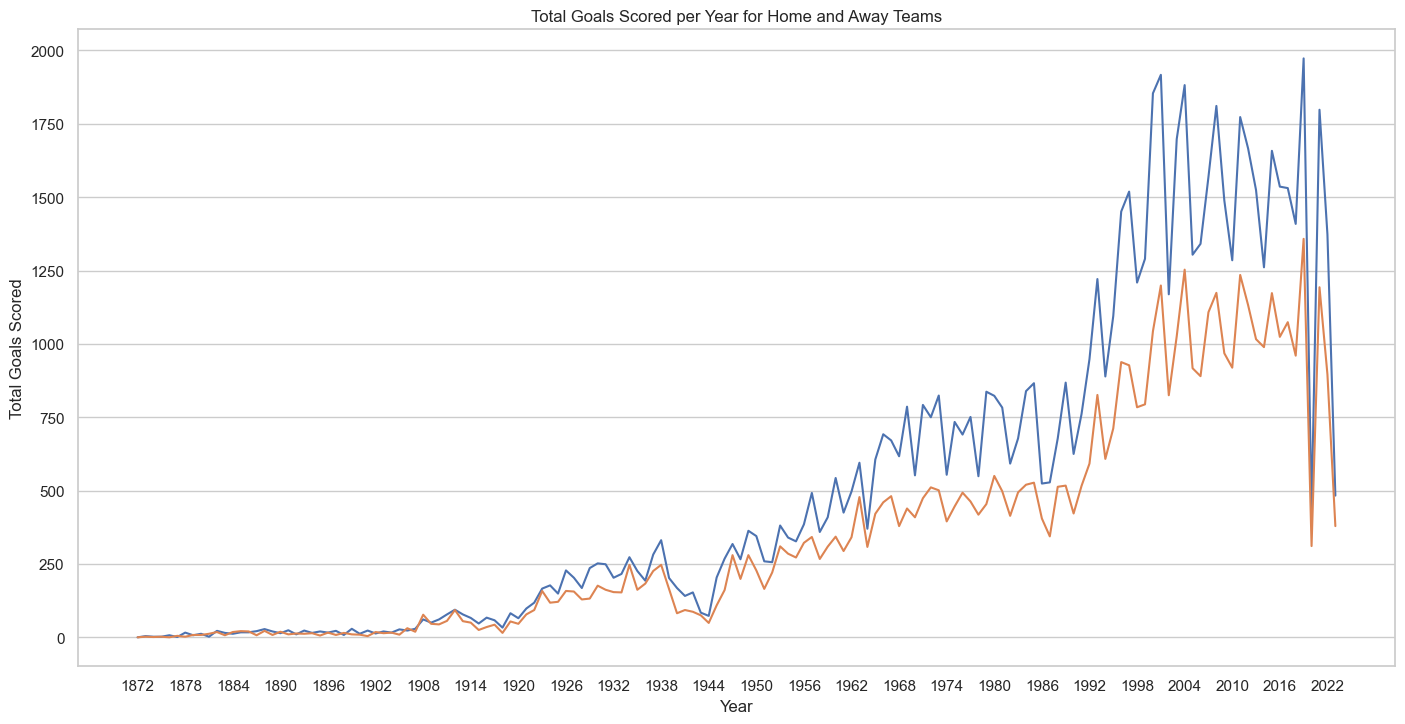

<Figure size 1700x827 with 0 Axes>

In [38]:
import seaborn as sns

fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(17,8.27)})


sns.lineplot(home_goals_per_year)
sns.lineplot(away_goals_per_year)

ax.xaxis.grid(False)
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.set(xlabel = 'Year', ylabel = 'Total Goals Scored',\
       title = 'Total Goals Scored per Year for Home and Away Teams')

plt.show()
plt.clf()

We can see a clear advantage in scoring goals when playing at home. Before we check if the home advantage is statistically significant, let's see if the increase in total goals scored each year is because of an increasing amount of games.

In [39]:
games_per_year = results.groupby('year').date.count()
games_per_year

year
1872       1
1873       1
1874       1
1875       1
1876       2
        ... 
2019    1161
2020     299
2021    1089
2022     915
2023     328
Name: date, Length: 152, dtype: int64

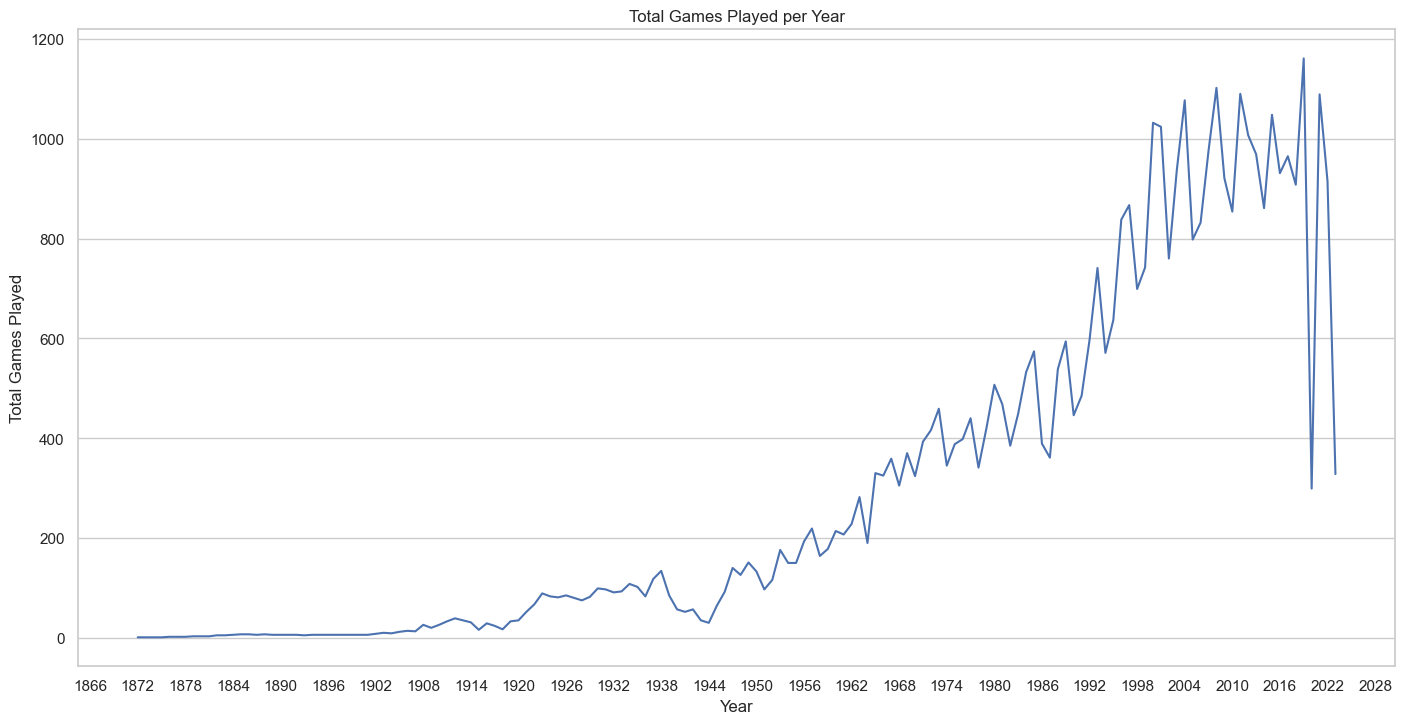

<Figure size 1700x827 with 0 Axes>

In [41]:
fig, ax = plt.subplots()

sns.set_style("whitegrid")
sns.lineplot(games_per_year)

ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.set(xlabel = 'Year', ylabel = 'Total Games Played', title = 'Total Games Played per Year')
ax.xaxis.grid(False)

plt.show()
plt.clf()

There is a clear correlation between year and total games played.

The sharp decline in 2020 was caused by COVID and 2023 is low because at the time of this anaylsis, we are only halfway through the year.

We can also see an increase in games on the lead up to the World Cup years, and then a sharp decline.

### Is there a statistically significant home advantage

Null hypothesis: There is no difference between playing at home or away: probability of a home win = 0.5



We'll use a binomial test as there are only two outcomes, home win and not home win.
We'll consider a draw as no home advantage so not a home win.

Home win = away loss and home loss = away win by definition. 

In [42]:
def homeaway(row):
    if row['winner'] == 'Draw':
        return 'Draw'
    elif row['home_team'] == row['winner']:
        return 'Home'
    else:
        return 'Away'
    

In [43]:
results['homeaway_win'] = results.apply(lambda row: homeaway(row), axis = 1)
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,penalty_winner,winner,year,total_score,homeaway_win,decade
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,No Penalties,Draw,1872,0,Draw,1870
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,No Penalties,England,1873,6,Home,1870
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,No Penalties,Scotland,1874,3,Home,1870
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,No Penalties,Draw,1875,4,Draw,1870
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,No Penalties,Scotland,1876,3,Home,1870


Just because a team is in the home_team column doesn't mean they're actually playing in their own country.

We need to specify home_team is equal to country played in.

In [44]:

true_home = results[results.home_team == results.country]

In [45]:
true_home.homeaway_win.value_counts()

Home    16690
Away     8681
Draw     7402
Name: homeaway_win, dtype: int64

In [46]:
true_home.homeaway_win.value_counts(normalize=True)

Home    0.509261
Away    0.264883
Draw    0.225857
Name: homeaway_win, dtype: float64

Countries at home have won 50.92% of the time.



In [47]:
from scipy.stats import binomtest

In [48]:
x = binomtest(16690, n = 32773, p=0.5)
x.pvalue

0.0008153217266612261

We can reject the null hypothesis at the 1% significance level. There is strong evidence that playing at home is advantageous.

This p-value means there is a 0.08% probability that the home team won more often by chance.

There are other variables to consider, so take this result with a pinch of salt.

### Best Teams by Decade

In [49]:
import math
results.year = results.year.astype('int')


def decade(row):
    return math.floor(row['year'] / 10) * 10

      
results['decade'] = results.apply(lambda row: decade(row), axis=1)

In [50]:
decade_win_nodraws = results[results.winner != 'Draw']

In [51]:
decade_win_stacked = decade_win_nodraws.groupby('decade').winner.value_counts()
decade_win_stacked

decade  winner                      
1870    Scotland                         8
        England                          3
1880    Scotland                        23
        England                         16
        Wales                            8
                                        ..
2020    Sri Lanka                        1
        Tahiti                           1
        Timor-Leste                      1
        United States Virgin Islands     1
        Vanuatu                          1
Name: winner, Length: 1807, dtype: int64

In [52]:
decade_win = decade_win_nodraws.groupby('decade').winner.value_counts().unstack()
decade_win.head()

winner,Abkhazia,Afghanistan,Albania,Alderney,Algeria,American Samoa,Andalusia,Andorra,Angola,Anguilla,...,Western Sahara,Yemen,Yemen DPR,Ynys Môn,Yorkshire,Yugoslavia,Zambia,Zanzibar,Zimbabwe,Åland Islands
decade,,,,,,,,,,,,,,,,,,,,,
1870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The agg() method allows you to apply a function or a list of function names to be executed along one of the axis of the DataFrame. 

The idxmax() method returns a Series with the index (the index here is the decade) of the maximum value for each specified axis.

Using idxmax(1) meant that the max of each row (decade) is returned and using the max function means the max value is also added to the series.

These are the most wins each decade.

In [53]:
top_per_decade = decade_win.agg(['idxmax','max'], axis=1)
top_per_decade = top_per_decade.rename(columns={'idxmax': 'Country', 'max': 'Total Games Won'})
top_per_decade

,Country,Total Games Won
decade,,
1870,Scotland,8.0
1880,Scotland,23.0
1890,England,24.0
1900,England,25.0
1910,Argentina,33.0
1920,Sweden,41.0
1930,Germany,55.0
1940,Argentina,43.0
1950,Brazil,61.0


### The Euros

In [54]:
results_euros = results[results.tournament == 'UEFA Euro']

In [55]:
euros_wins = results_euros.winner.value_counts()
euros_wins

Draw                   63
Germany                29
Spain                  25
Italy                  25
France                 22
Portugal               21
Netherlands            21
England                16
Russia                 13
Czech Republic         13
Denmark                11
Belgium                11
Croatia                 9
Sweden                  7
Greece                  5
Czechoslovakia          5
Wales                   5
Turkey                  5
Switzerland             4
Poland                  3
Ukraine                 3
Republic of Ireland     2
Iceland                 2
Slovakia                2
Hungary                 2
Yugoslavia              2
Scotland                2
Austria                 2
Romania                 1
Serbia                  1
Norway                  1
Bulgaria                1
Northern Ireland        1
Albania                 1
Finland                 1
Name: winner, dtype: int64

Germany and Spain have won the most games, with both countries winning three tournaments each.

Italy and France have won the tournaments twice each.

USSR (now Russia), Czechoslovakia, Netherlands, Denmark, Greece and Portugal have all won the Euros once.

Interestingly, England have won more games than 4 previous Euros winners, yet have never won the tournament.

Out of Greece's 5 wins, 4 came when they won the Euros in 2004, and the other win happeneded in 2012.

In [56]:
total_euros_games = results_euros.home_team.value_counts() + results_euros.away_team.value_counts()
total_euros_games.sort_values(ascending=False)

Germany                53.0
Spain                  46.0
Italy                  45.0
France                 43.0
Portugal               39.0
Netherlands            39.0
England                38.0
Russia                 36.0
Denmark                33.0
Czech Republic         29.0
Sweden                 24.0
Croatia                22.0
Belgium                22.0
Switzerland            18.0
Turkey                 18.0
Romania                16.0
Greece                 16.0
Poland                 14.0
Hungary                11.0
Ukraine                11.0
Republic of Ireland    10.0
Yugoslavia             10.0
Austria                10.0
Wales                  10.0
Scotland                9.0
Czechoslovakia          8.0
Slovakia                7.0
Bulgaria                6.0
Iceland                 5.0
Northern Ireland        4.0
Serbia                  4.0
Slovenia                3.0
Norway                  3.0
Latvia                  3.0
Finland                 3.0
Albania             

In [57]:
euros_win_perc =  euros_wins / total_euros_games
euros_win_perc.sort_values(ascending=False).fillna(0).round(2) * 100

Czechoslovakia         62.0
Italy                  56.0
Germany                55.0
Spain                  54.0
Portugal               54.0
Netherlands            54.0
France                 51.0
Belgium                50.0
Wales                  50.0
Czech Republic         45.0
England                42.0
Croatia                41.0
Iceland                40.0
Russia                 36.0
Norway                 33.0
Albania                33.0
Finland                33.0
Denmark                33.0
Greece                 31.0
Sweden                 29.0
Slovakia               29.0
Turkey                 28.0
Ukraine                27.0
Serbia                 25.0
Northern Ireland       25.0
Scotland               22.0
Switzerland            22.0
Poland                 21.0
Republic of Ireland    20.0
Austria                20.0
Yugoslavia             20.0
Hungary                18.0
Bulgaria               17.0
Romania                 6.0
Draw                    0.0
Latvia              

Czechoslovakia is first because they only ever qualified for 3 finals; 1960, 1976 (Winner), 1980.

They have only played 8 games in total because before 1980, the tournament consisted of 4 teams, so they technically only played 2 games in 1960 and 1976. Then in 1980, there were 8 teams in the tournament so they played 4 games then. They got 1 win in 1960, 2 in 1976 and 2 in 1980.